In [1]:
!pip install python-chess

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 34.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for chess: filename=chess-1.11.2-py3-none-any.whl size=147775 sha256=87292ba270dee68a92adac294f7f270f5957ea278df95f8bbcf88917ee788503
  Stored in directory: /root/.cache/pip/wheels/fb/5d/5c/59a62d8a695285e59ec9c1f66add6f8a9ac4152499a2be0113
Successfully built chess


r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R


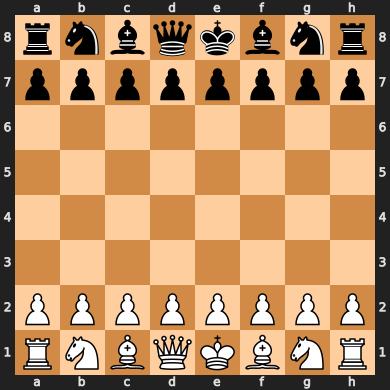

In [3]:
import chess
board = chess.Board()
print(board)
board

In [4]:
for move in board.legal_moves:
    print(move)

g1h3
g1f3
b1c3
b1a3
h2h3
g2g3
f2f3
e2e3
d2d3
c2c3
b2b3
a2a3
h2h4
g2g4
f2f4
e2e4
d2d4
c2c4
b2b4
a2a4


In [8]:
import numpy as np

def one_hot_encode_peice(piece):
    pieces = list('rnbqkpRNBQKP.')
    arr = np.zeros(len(pieces))
    piece_to_index = {p: i for i, p in enumerate(pieces)}
    index = piece_to_index[piece]
    arr[index] = 1
    return arr

one_hot_encode_peice('b')

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [11]:
def encode_board(board):
    board_str = str(board)
    board_str = board_str.replace(' ', '')
    board_list = []
    for row in board_str.split('\n'):
        row_list = []
        for piece in row:
            row_list.append(one_hot_encode_peice(piece))
        board_list.append(row_list)
    return np.array(board_list)

encode_board(chess.Board())

array([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]],

    

In [12]:
!pip install -q kaggle

In [13]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jksanjay","key":"4d0d11b3272da4886746c591a29b13bb"}'}

In [14]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [15]:
!chmod 600 ~/.kaggle/kaggle.json

In [17]:
!kaggle competitions download -c train-an-ai-to-play-chess

  0% 0.00/1.43M [00:00<?, ?B/s]
100% 1.43M/1.43M [00:00<00:00, 458MB/s]


In [19]:
import zipfile

with zipfile.ZipFile("train-an-ai-to-play-chess.zip", 'r') as zip_ref:
    zip_ref.extractall("chess_data")

In [20]:
import pandas as pd

train_df = pd.read_csv('chess_data/train.csv', index_col='id')

train_df = train_df[:10000]

val_df = train_df[-1000:]
train_df.head()

,board,black_score,best_move
id,,,
80091,6R1/8/5K2/8/5k2/8/8/2r5 w - - 89 118,0.0,g8d8
18578,r1bn1rk1/1p2b1p1/1q2p2p/p2p1p1n/P2P3P/2PB1N2/1...,-131.0,f3e5
11580,r2qkb1r/2p2pp1/p1n2nP1/1p1p3p/P7/1Q5b/1PP1PPB1...,-490.0,g6f7
72805,8/4kp2/R6p/8/4K3/8/8/8 b - - 7 85,-574.0,h6h5
74310,8/8/k7/4R3/8/6K1/8/1r6 w - - 99 90,0.0,e5e6


In [21]:
import numpy as np
def encode_fen_string(fen_str):
    board = chess.Board(fen=fen_str)
    return encode_board(board)

X_train = np.stack(train_df['board'].apply(encode_fen_string))
y_train = train_df['black_score']


X_val = np.stack(val_df['board'].apply(encode_fen_string))
y_val = val_df['black_score']

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1),
])

model.compile(
    optimizer='rmsprop',
    loss='mean_squared_error')

In [23]:
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    validation_data=(X_val, y_val))

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 150660.4375 - val_loss: 140521.7188
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 154871.0312 - val_loss: 136334.5938
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 152879.7188 - val_loss: 132197.9844
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 150738.0469 - val_loss: 128149.3516
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 138004.4844 - val_loss: 125002.6328
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 131910.0000 - val_loss: 122375.7891
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 123818.0859 - val_loss: 120467.2188
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 134673.4062 - val_loss: 118367.6953
Epoch 9/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 124942.4141 - val_loss: 116018.3359
Epoch 10/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 133181.7812 - val_loss: 114625.8750
Epoch 11/20
313/313 ━━━━━━━━━━━━━━━━━━━

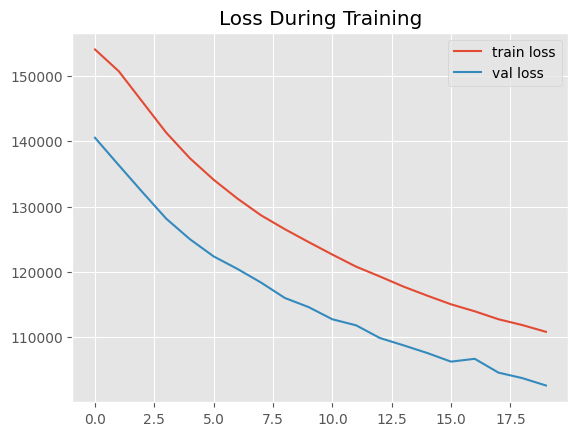

In [24]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss During Training')
plt.show()

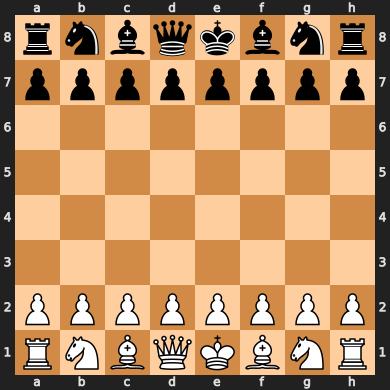

Your Move: e2e4


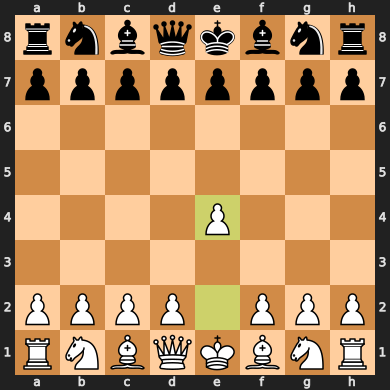

AI move: b8c6


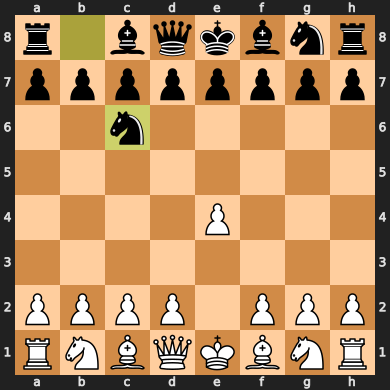

Your Move: b1c3


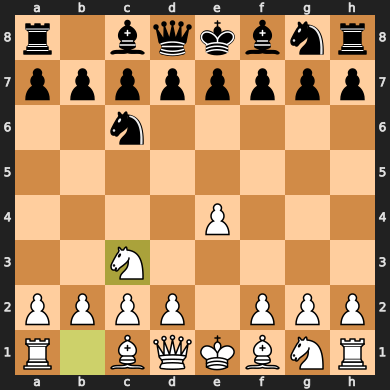

AI move: d7d5


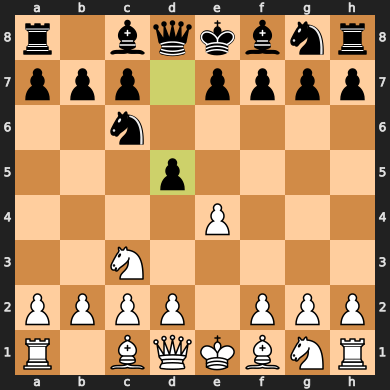

Your Move: quit
None


In [49]:
from IPython.display import display, SVG
def play_game(ai_function):
    board = chess.Board()

    while board.outcome() is None:
        display(SVG(board._repr_svg_()))

        if board.turn == chess.WHITE:
            user_move = input('Your Move: ')
            if user_move == 'quit':
                break
            while user_move not in [str(move) for move in board.legal_moves]:
                print('That wasn\'t a valid move. Please enter a move in Standard Algebraic Notation')
                user_move = input('Your move: ')
            board.push_san(user_move)

        elif board.turn == chess.BLACK:
            ai_move = ai_function(board.fen())
            print(f'AI move: {ai_move}')
            board.push_san(ai_move)
    print(board.outcome())

def play_nn(fen, show_move_evaluations=False):
    board = chess.Board(fen=fen)
    moves = []
    input_vectors = []
    for move in board.legal_moves:
        candidate_board = board.copy()
        candidate_board.push(move)
        moves.append(move)
        input_vectors.append(encode_board(str(candidate_board)).astype(np.int32))

    input_vectors = np.stack(input_vectors)
    scores = model.predict(input_vectors, verbose=0)

    if board.turn == chess.BLACK:
      index_of_best_move = np.argmax(scores)
    else:
      index_of_best_move = np.argmax(-scores)

    best_move = moves[index_of_best_move]

    return str(best_move)

play_game(play_nn)

In [50]:
model = Sequential([
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1),
])

model.compile(
    optimizer='rmsprop',
    loss='mean_squared_error')

In [51]:
history = model.fit(
    X_train,
    y_train,
    epochs=40,
    validation_data=(X_val, y_val))

Epoch 1/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 153516.2500 - val_loss: 128187.7266
Epoch 2/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 135223.8281 - val_loss: 114161.2500
Epoch 3/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 120282.4062 - val_loss: 109551.5859
Epoch 4/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 116437.9375 - val_loss: 100043.0781
Epoch 5/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 110192.2500 - val_loss: 102982.6250
Epoch 6/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 111230.2422 - val_loss: 93467.3906
Epoch 7/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 99530.7500 - val_loss: 87920.6641
Epoch 8/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 96952.1875 - val_loss: 92080.0078
Epoch 9/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 92907.2500 - val_loss: 85774.9531
Epoch 10/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 91277.9844 - val_loss: 82236.9609
Epoch 11/40
313/313 ━━━━━━━━━━━━━━━━━━━

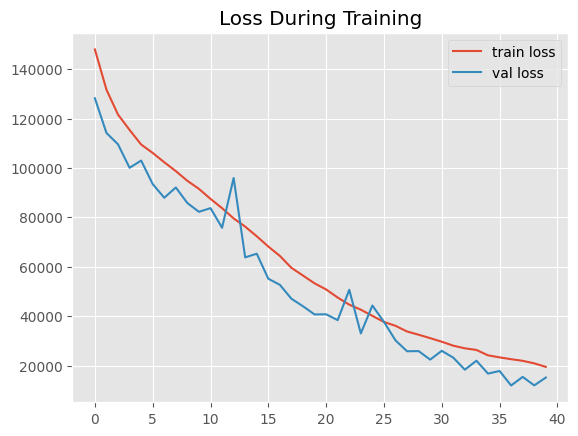

In [52]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss During Training')
plt.show()

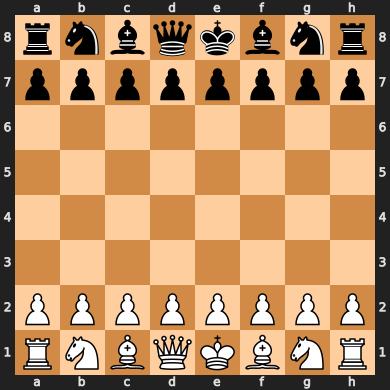

Your Move: b1c3


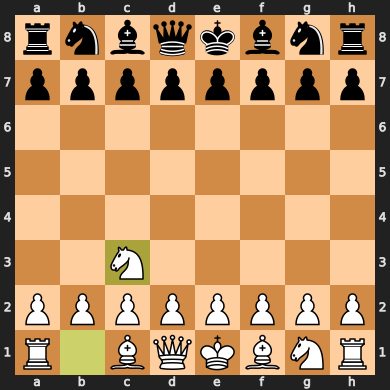

AI move: e7e5


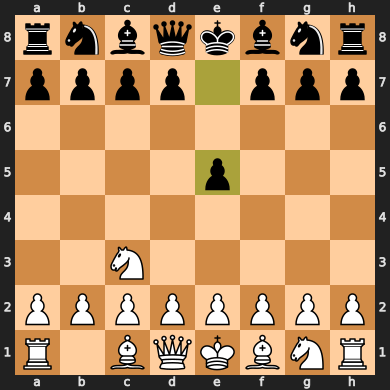

Your Move: d1d4
That wasn't a valid move. Please enter a move in Standard Algebraic Notation
Your move: d2d4


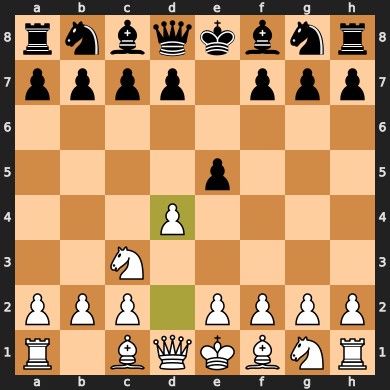

AI move: e5d4


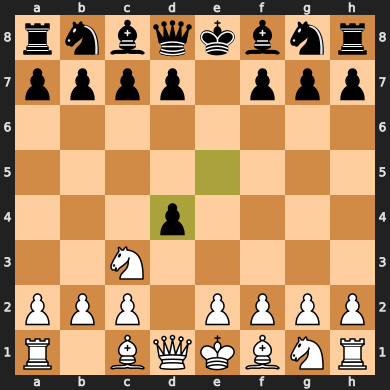

Your Move: d1d4


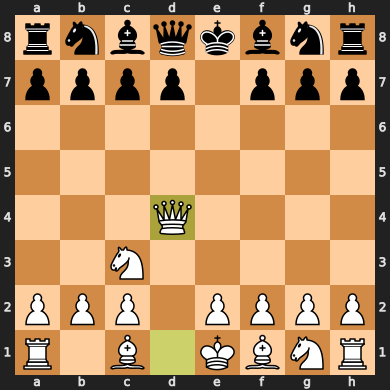

AI move: b8c6


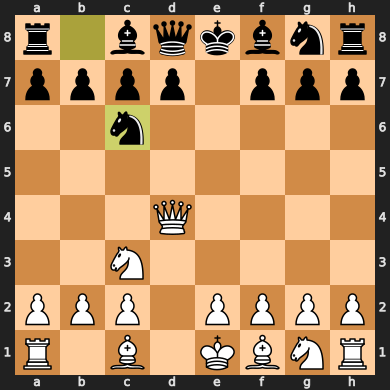

Your Move: d4e3


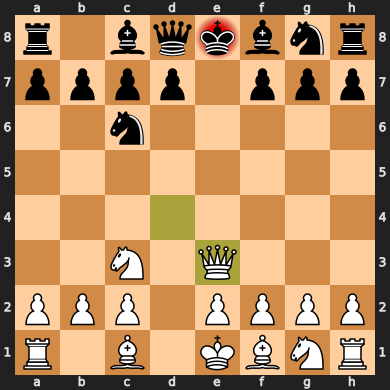

AI move: f8e7


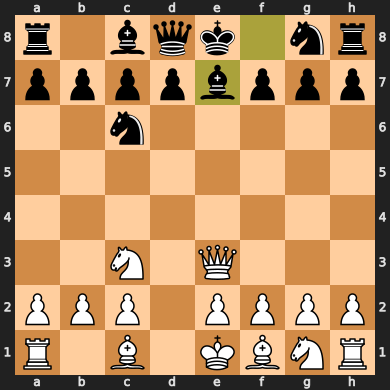

Your Move: quit
None


In [53]:
play_game(play_nn)

In [62]:
train_df = pd.read_csv('chess_data/train.csv', index_col='id')

def count_material(fen):
    total_material = 0
    material_dict = {
        'p': 1,
        'b': 3,
        'n': 3,
        'r': 5,
        'q': 9
    }
    for char in fen.lower():
        if char in material_dict:
            total_material += material_dict[char]

    return total_material

train_df['total_material'] = train_df['board'].apply(count_material)

(array([ 5973., 11022.,  8581.,  6077.,  4980.,  4993.,  4471.,  3682.,
         2834.,  6172.]),
 array([  1.,  11.,  21.,  31.,  41.,  51.,  61.,  71.,  81.,  91., 101.]),
 <BarContainer object of 10 artists>)

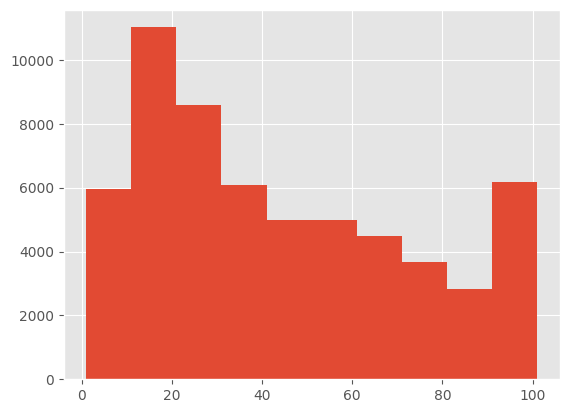

In [63]:
import matplotlib.pyplot as plt

plt.hist(train_df['total_material'])

We have a lot of boards with relatively few points,
and only a few with more than 70.
We see an interesting spike around 100, which is
probably due to promotion, when a pawn reaches the end of board and can turn into a queen. Promotion usually happens near the end of a game, so our hueristic isn't perfect (sometimes having a lot of points of material left means you're in the endgame).

Let's say:

Opening: > 60 points of material

Midgame: between 30 and 60 points of material

Endgame: less than 30 points of material

In [64]:
endgame_df = train_df[train_df['total_material'] < 30]
midgame_df = train_df[(30 <= train_df['total_material']) & (train_df['total_material'] <= 60)]
opening_df = train_df[60 < train_df['total_material']]

In [65]:
def encode_fen_string(fen_str):
    board = chess.Board(fen=fen_str)
    return encode_board(board)

Epoch 1/40
755/755 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 169108.4375 - val_loss: 131084.9375
Epoch 2/40
755/755 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 145672.1094 - val_loss: 116539.6797
Epoch 3/40
755/755 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 114814.9531 - val_loss: 110284.8203
Epoch 4/40
755/755 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 108199.7188 - val_loss: 106843.7500
Epoch 5/40
755/755 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 116438.2734 - val_loss: 102343.5703
Epoch 6/40
755/755 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 109478.9688 - val_loss: 106122.5859
Epoch 7/40
755/755 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 100856.7969 - val_loss: 113390.0312
Epoch 8/40
755/755 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 98617.3516 - val_loss: 106398.8906
Epoch 9/40
755/755 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 96600.6875 - val_loss: 98822.9531
Epoch 10/40
755/755 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 102382.1562 - val_loss: 99423.3516
Epoch 11/40
755/755 ━━━━━━━━━━━

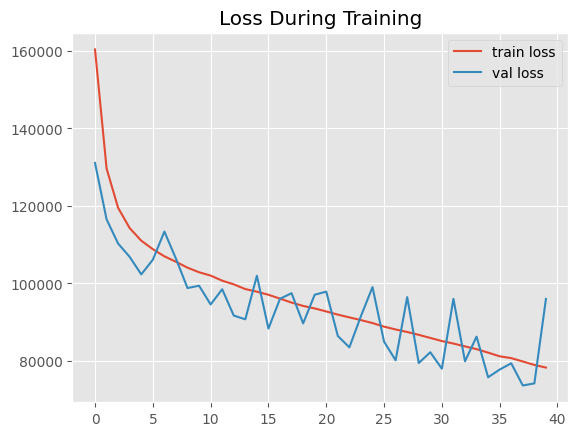

In [66]:
def generate_model(data_to_train_on):
    val_df = data_to_train_on[-1000:]
    train_df = data_to_train_on[:-1000]

    X_train = np.stack(train_df['board'].apply(encode_fen_string))
    y_train = train_df['black_score']

    X_val = np.stack(val_df['board'].apply(encode_fen_string))
    y_val = val_df['black_score']

    model = Sequential([
        Flatten(),
        Dense(1024, activation='relu'),
        Dense(1),
    ])

    model.compile(
        optimizer='rmsprop',
        loss='mean_squared_error')

    history = model.fit(
        X_train,
        y_train,
        epochs=40,
        validation_data=(X_val, y_val))

    plt.style.use('ggplot')
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.legend()
    plt.title('Loss During Training')
    plt.show()

    return model

endgame_model = generate_model(endgame_df)

Epoch 1/40
485/485 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 166067.2656 - val_loss: 151028.9688
Epoch 2/40
485/485 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 150138.6406 - val_loss: 139035.6406
Epoch 3/40
485/485 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 139540.0469 - val_loss: 132365.2500
Epoch 4/40
485/485 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 125360.7109 - val_loss: 120382.4297
Epoch 5/40
485/485 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 116610.7344 - val_loss: 119507.8984
Epoch 6/40
485/485 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 104201.2891 - val_loss: 109862.5781
Epoch 7/40
485/485 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 106573.1875 - val_loss: 106608.9062
Epoch 8/40
485/485 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 100764.3672 - val_loss: 112541.2656
Epoch 9/40
485/485 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 96669.0391 - val_loss: 103853.3281
Epoch 10/40
485/485 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 99473.0781 - val_loss: 107291.8203
Epoch 11/40
485/485 ━━━━━━━━━━━

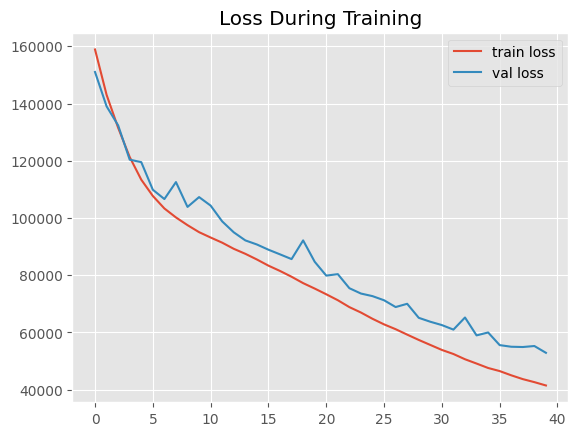

In [67]:
midgame_model = generate_model(midgame_df)

Epoch 1/40
505/505 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 121549.3984 - val_loss: 100815.5391
Epoch 2/40
505/505 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 107451.4766 - val_loss: 88493.8594
Epoch 3/40
505/505 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 97040.2891 - val_loss: 79917.2031
Epoch 4/40
505/505 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 86202.6094 - val_loss: 75276.4766
Epoch 5/40
505/505 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 79528.0312 - val_loss: 70083.1094
Epoch 6/40
505/505 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 75262.0000 - val_loss: 67603.7656
Epoch 7/40
505/505 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 72246.8594 - val_loss: 66112.5391
Epoch 8/40
505/505 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 68616.1250 - val_loss: 64479.1758
Epoch 9/40
505/505 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 67774.5859 - val_loss: 63742.4688
Epoch 10/40
505/505 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 65117.2461 - val_loss: 61525.5625
Epoch 11/40
505/505 ━━━━━━━━━━━━━━━━━━━━ 5s 11m

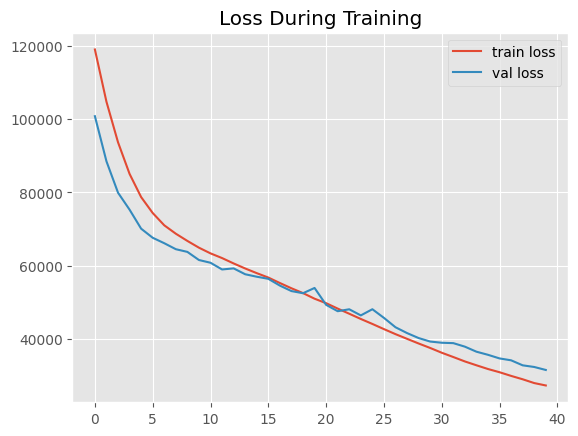

In [68]:
opening_model = generate_model(opening_df)

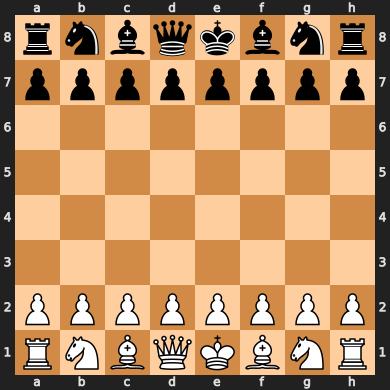

Your Move: b1c3


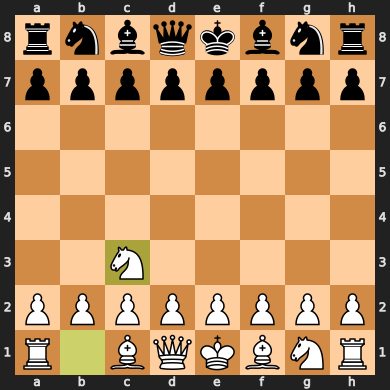

AI move: d7d5


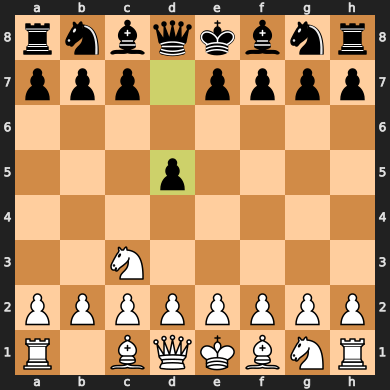

Your Move: c3d5


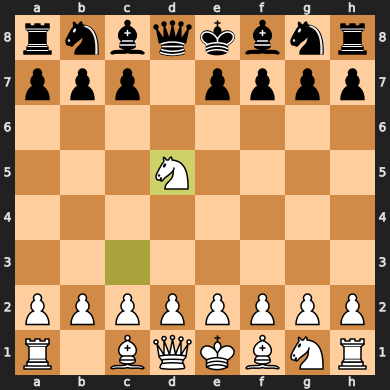

AI move: b8d7


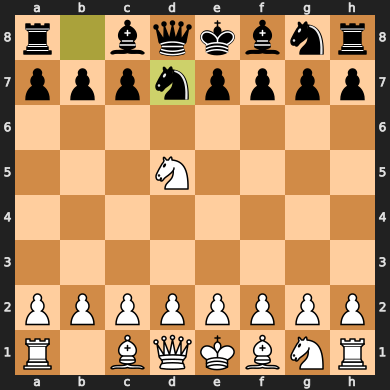

Your Move: d5c7


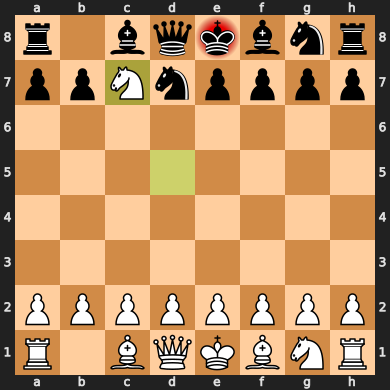

AI move: d8c7


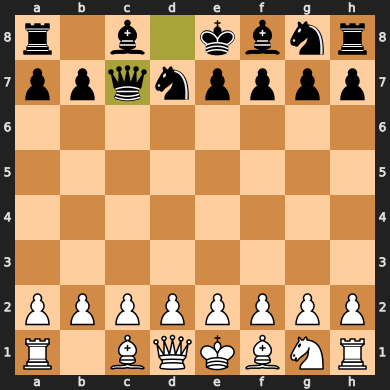

Your Move: quit
None


In [93]:
def play_nn2(fen, show_move_evaluations=False):
    board = chess.Board(fen=fen)

    material = count_material(fen)
    if material < 30:
        model = endgame_model
    elif material < 60:
        model = midgame_model
    else:
        model = opening_model
    moves = []
    input_vectors = []
    for move in board.legal_moves:
        candidate_board = board.copy()
        candidate_board.push(move)
        moves.append(move)
        input_vectors.append(encode_board(str(candidate_board)).astype(np.int32))

    input_vectors = np.stack(input_vectors)
    scores = model.predict(input_vectors, verbose=0)
    if board.turn == chess.BLACK:
        index_of_best_move = np.argmax(scores)
    else:
        index_of_best_move = np.argmax(-scores)

    if show_move_evaluations:
        print(zip(moves, scores))

    best_move = moves[index_of_best_move]

    return str(best_move)

play_game(play_nn2)

In [94]:
test_df = pd.read_csv('chess_data/test.csv')

test_df.head()

,id,board
0,7937,r1bqk2r/pp2bpp1/2n1pn1p/2pp4/3P1B2/2P1PN2/PP1N...
1,20035,2r2k1r/pp2pp1p/1q3npb/1B1N4/8/P4Q1P/1P3PP1/R2R...
2,71263,3b4/8/5k2/5p2/8/4K3/8/5B2 b - - 2 80
3,61997,5k2/R7/3r3p/2PP2pP/5pb1/P1K5/6B1/8 w - - 1 61
4,26510,r3r1k1/pb3p1p/1p1q2p1/3P1p2/3Q1P2/5N2/PP4PP/3R...


In [96]:
test_df['best_move'] = test_df['board'].apply(play_nn2)

In [97]:
test_df['best_move']

,best_move
0,c5d4
1,b5c6
2,f6f7
3,c5d6
4,a8d8
...,...
195,b4b2
196,h7h6
197,c7c8r
198,h5h4
